<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка-Данных" data-toc-modified-id="Загрузка-Данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка Данных</a></span><ul class="toc-item"><li><span><a href="#Несколь-слов-о-среднестатистическом-клиенте" data-toc-modified-id="Несколь-слов-о-среднестатистическом-клиенте-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Несколь слов о среднестатистическом клиенте</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li><li><span><a href="#Промежуточный-вывод:" data-toc-modified-id="Промежуточный-вывод:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Промежуточный вывод:</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Построение-моделей-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-моделей-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение моделей прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#вывод" data-toc-modified-id="вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Введение
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

## Загрузка Данных

Данные клиента за предыдущий до проверки факта оттока месяц:  
'gender' — пол;  
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;  
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
'Phone' — наличие контактного телефона;  
'Age' — возраст;  
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).  
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:  
'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);  
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);  
'Group_visits' — факт посещения групповых занятий;  
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;  
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;  
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.  
'Churn' — факт оттока в текущем месяце.

In [1]:
import pandas as pd 
from pymystem3 import Mystem as m 
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import math as mth
pd.set_option('display.max_columns', None)
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os # для проверки правильности загрузки данных
import matplotlib.ticker as ticker # библ. для тиков на осях
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Машинное обучение
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [3]:
## Функция для предварительного анализа
def preanalis(dataset):
    dataset.info()
    print()
    print('кол-во дубликатов', dataset.duplicated().sum())
    print()
    print('Пропуски')
    print(dataset.isnull().sum())
    print()
    print('Характерисики значений')
    print(dataset.describe())

In [4]:
pth1 = '/datasets/gym_churn.csv'

if os.path.exists(pth1) :
    data = pd.read_csv(pth1,sep= ',')
else:
    print('Ничего не получилось =(')

In [5]:
preanalis(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
data.mean()

gender                                0.51
Near_Location                         0.85
Partner                               0.49
Promo_friends                         0.31
Phone                                 0.90
Contract_period                       4.68
Group_visits                          0.41
Age                                  29.18
Avg_additional_charges_total        146.94
Month_to_end_contract                 4.32
Lifetime                              3.72
Avg_class_frequency_total             1.88
Avg_class_frequency_current_month     1.77
Churn                                 0.27
dtype: float64

### Несколь слов о среднестатистическом клиенте
1) Средний возраст 29 лет  
2) Большинство клиентов живет или работает в одном районе со спортзалом.  
3) Посещает зал примерно 2 раза в неделю  
4) Срок окончания абонемента через 4 месяца.  

In [7]:
data.columns = data.columns.str.lower() #Перевод в ниний регистр

In [8]:
churn_on = data.groupby(data['churn']).mean().rename(index={0: 'Не ушли', 1: 'Ушли'})
churn_on.T

churn,Не ушли,Ушли
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


### Промежуточный вывод
В целом видно, что в целом у ушедших клиентов:  
1) Меньшая активность   
2) Меньший возраст  
3) Меньше выручка в месяц и суммарная выручка от других услуг фитнес-центра

In [9]:
feat = data.drop(columns =(['gender', 'near_location', 
                            'partner','promo_friends', 'phone',
                            'group_visits', 'contract_period', 'churn'])).columns # получаем список столбцов
churn_on = data.query('churn == 0') # Делим по уходу
churn_off = data.query('churn == 1')

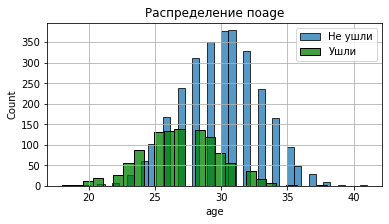

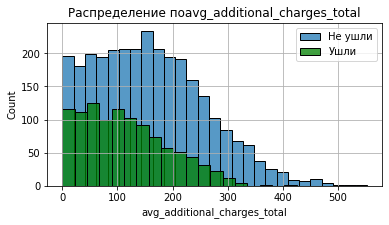

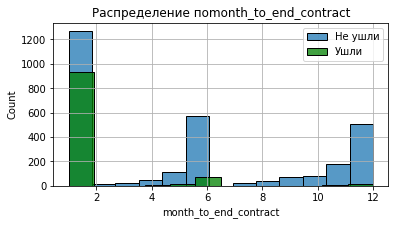

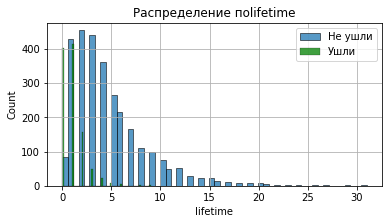

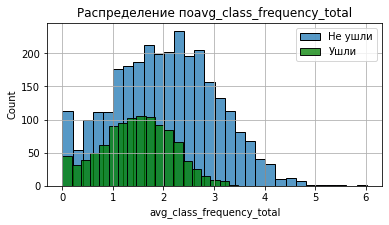

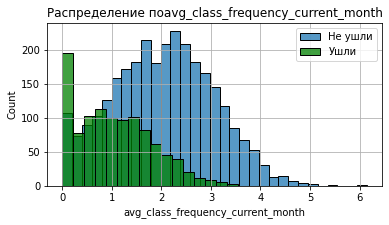

In [10]:
for col in feat:
    plt.figure(figsize=(6, 3))
    sns.histplot(churn_on[col])
    sns.histplot(churn_off[col], color = 'g')
    plt.legend(labels = ('Не ушли', 'Ушли'))
    plt.title('Распределение по' + col)
    plt.grid()
    plt.show()

### Промежуточный вывод:
Молодые уходят чаще, чем взрслые:  
1) Ушедшие клиенты тратят меньше   
2) Уходят только новички, если клиент проходил в зал больше 5 ммесяцев, то его уход почти равен нулю  
3) Ушедшие клиенты чаще всего посещают зал 1 до 2 раз в неделю  
4) Если клиент ниразу не посетил зал за месяц, то вероятнее всего ушел

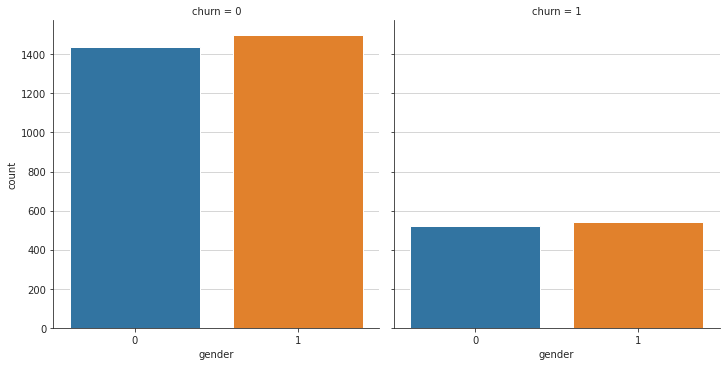

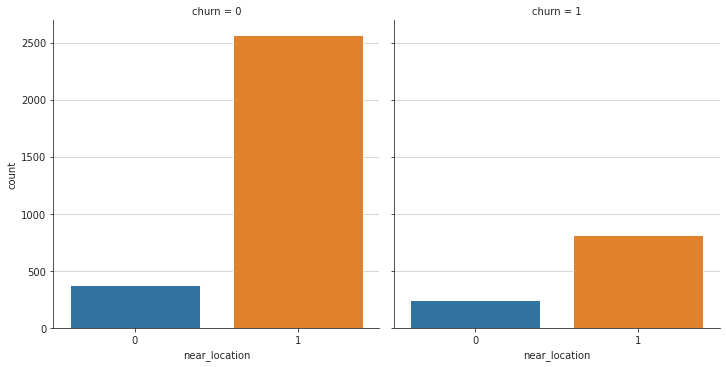

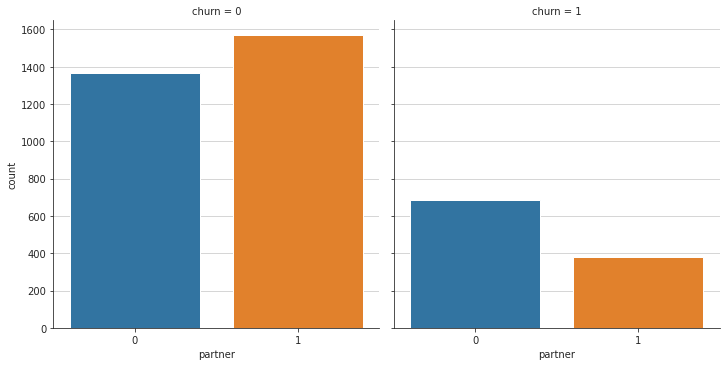

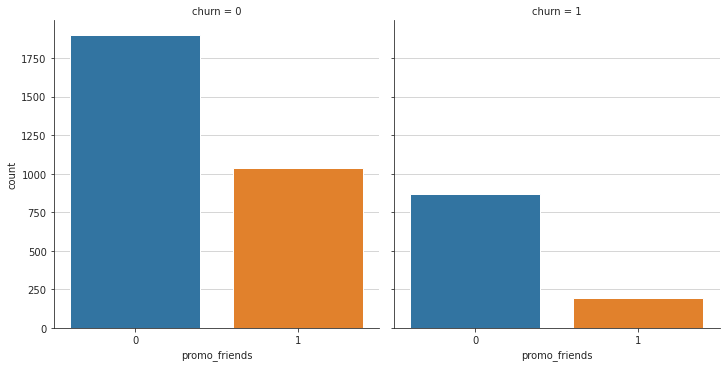

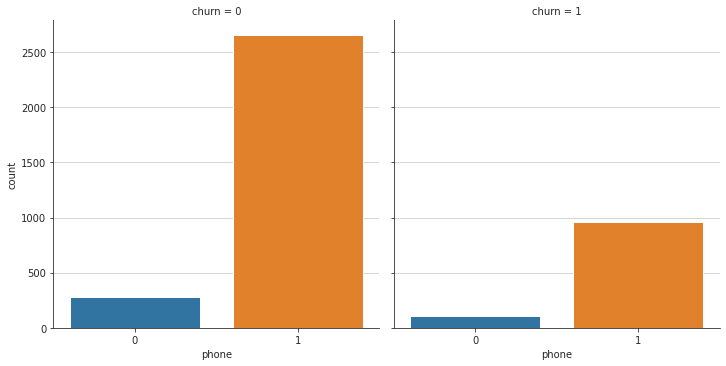

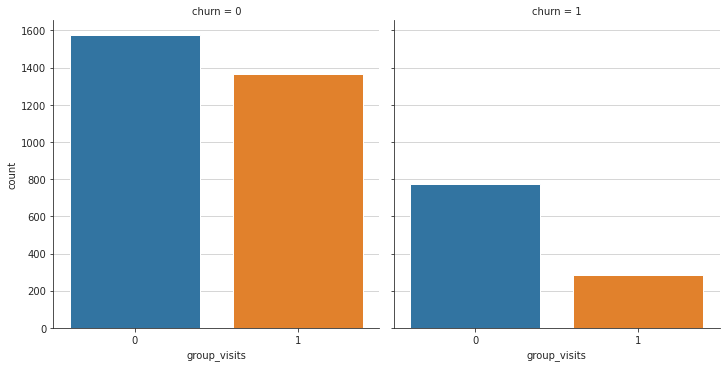

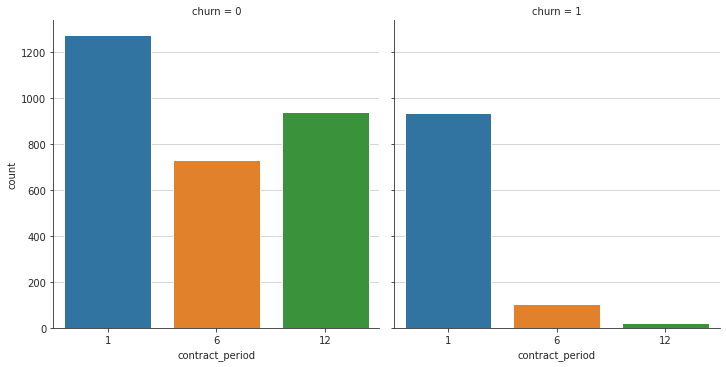

In [11]:
for col in ['gender', 'near_location', 'partner','promo_friends', 'phone', 'group_visits', 'contract_period']:
    sns.set_style("ticks",{'axes.grid' : True})
    sns.catplot(col, col="churn", data = data, kind="count")

Видим, что чаще уходят клиенты которые:

Покупают абонемент всего на один месяц
Реже посещают групповые занятия

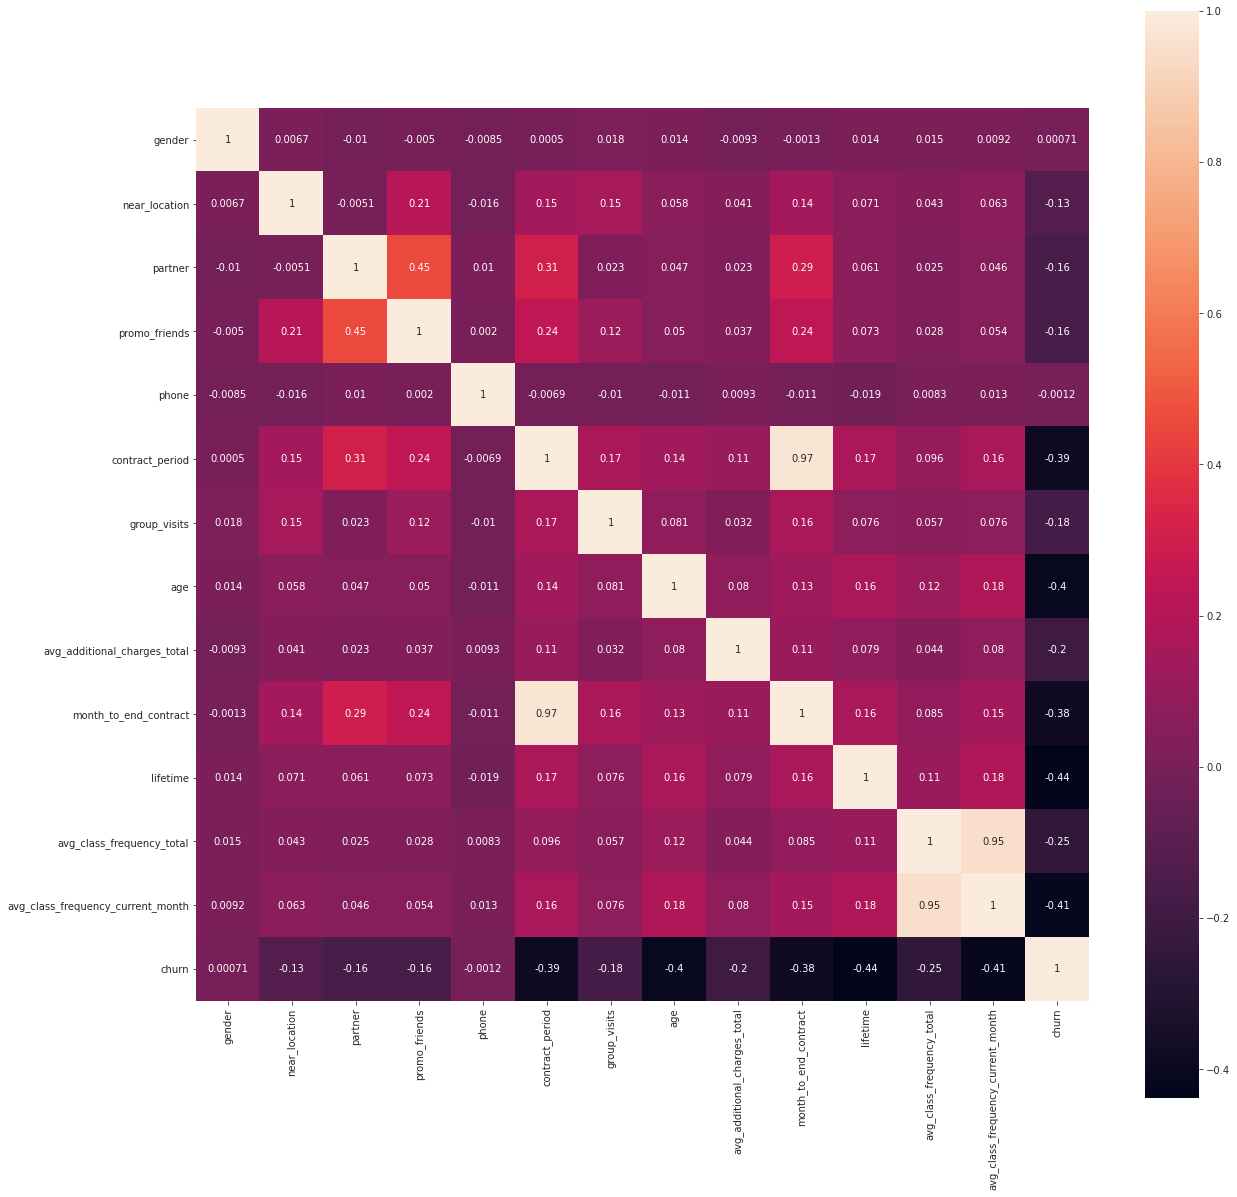

In [12]:
matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True, square=True)
plt.show()

### Промежуточный вывод
Видно, что сильно коррелируются такие признаки как month_to_end_contract и contract_period = 0,97, а так же avg_class_frequency_current_month и avg_class_frequency_total = 0,95. Отметим что сильная кореляция двух признаков нежелательна для линейной модели. В следующих шагах нужно будет эти признаки.

## Построение моделей прогнозирования оттока клиентов

In [13]:
# Старый код
#X = data.drop(['churn','avg_class_frequency_current_month', 'month_to_end_contract'], axis = 1) 
## Убрали также коррелирующие признаки
#y = data['churn']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X = data.drop(['churn','avg_class_frequency_current_month', 'month_to_end_contract'], axis = 1) 
## Убрали также коррелирующие признаки
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 123)

In [41]:
lr_model = LogisticRegression(random_state = 123)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [42]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Accuracy: 0.89
Precision: 0.80
Recall: 0.79


In [43]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 123)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [44]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.80
Recall: 0.78


###  вывод
В целом модели не отличаются, но модель **логистической** регресси показала себя чуть лучше, чем модель случайного леса.

## Кластеризация клиентов

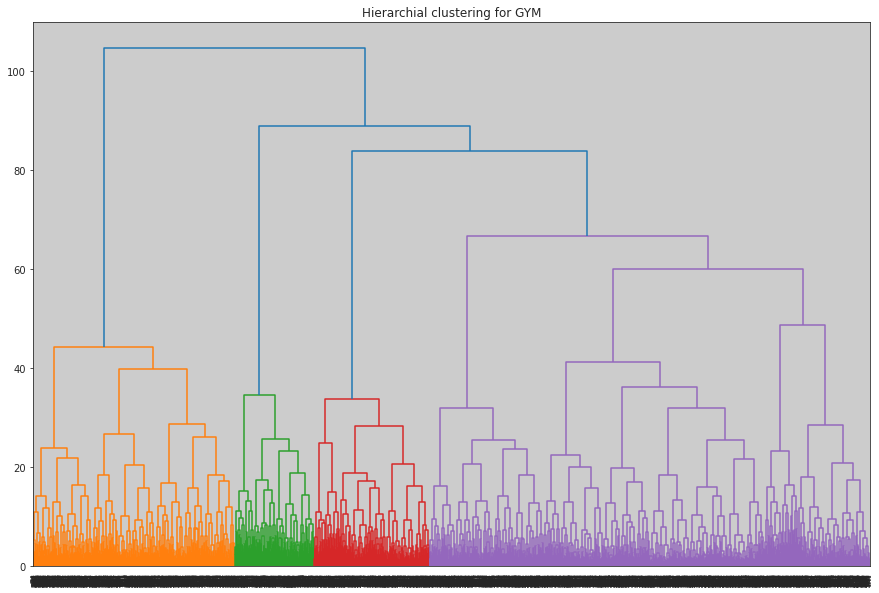

In [18]:
sc = StandardScaler()
x_sc = sc.fit_transform(data.drop('churn', axis = 1))

linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

In [19]:
km = KMeans(n_clusters = 5, random_state=123)
labels = km.fit_predict(x_sc)
data_clust = data
data_clust['cluster_km'] = labels

In [20]:
data_clust_fin = data_clust.copy(deep=True)
data_grouped_mean = data_clust_fin.groupby('cluster_km').agg('mean')
data_grouped_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.56,0.85,0.28,0.07,1.00,2.68,0.45,30.05,160.97,2.48,4.87,2.81,2.80,0.08
1,0.49,0.95,0.81,1.00,1.00,3.02,0.44,29.05,141.36,2.83,3.70,1.70,1.59,0.26
2,0.50,0.94,0.74,0.48,1.00,11.83,0.55,29.89,163.43,10.79,4.71,2.00,1.99,0.02
3,0.52,0.86,0.47,0.31,0.00,4.78,0.43,29.30,144.21,4.47,3.94,1.85,1.72,0.27
4,0.49,0.73,0.30,0.01,1.00,1.93,0.28,28.14,129.71,1.83,2.22,1.26,1.01,0.56


### Промежуточный вывод
Самая высокая доля оотока у 4-го кластера - 56%, у 1-го  - 26%, минимальные значения у 0-го и 2-го кластеров - 8% и 2%. Кластеры 0, 2 будем счиать костяком клуба.



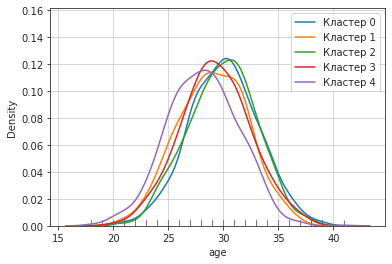

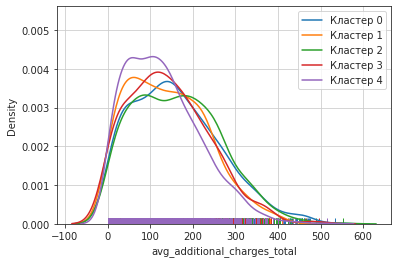

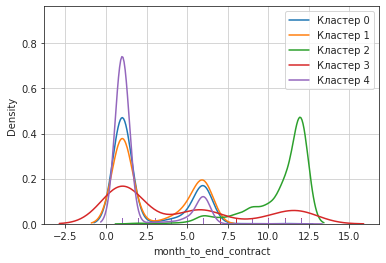

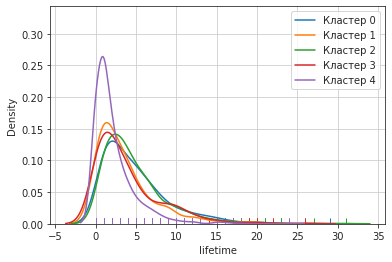

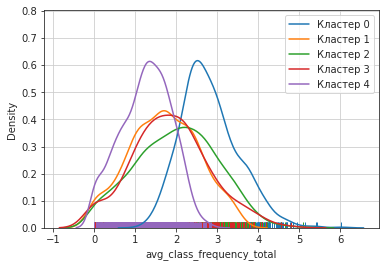

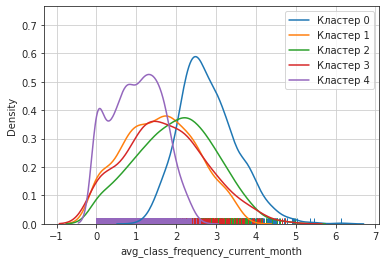

In [21]:

for col in feat:
    plt.figure()
    for i in range(0,5):
        sns.distplot(data_clust.query('cluster_km == @i')[col],
                    hist=False,
                    rug=True,
                    label='Кластер '+ str(i))
    plt.legend()

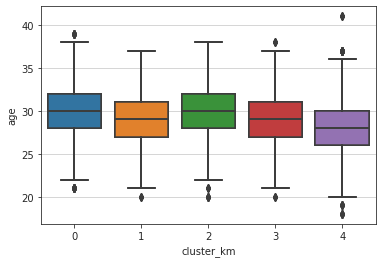

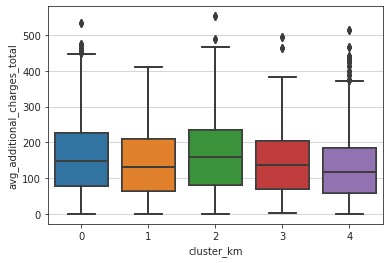

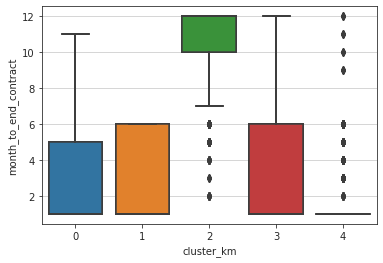

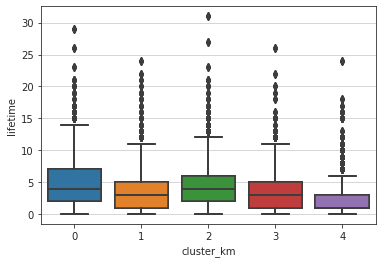

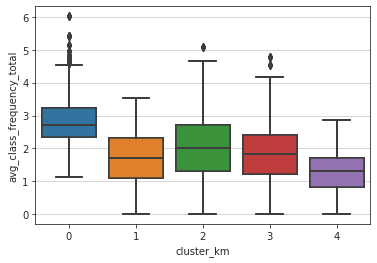

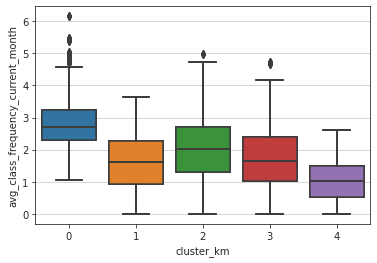

In [54]:
for col in feat:
    plt.figure()
    for i in range(0,5):
        sns.boxplot(x ='cluster_km',y = col, data = data_clust)

### Промежуточный вывод
Характеристика ушедших (4 кластер):
1) Больше всего ушедших - клиенты 28 лет.  
2) Платят меньше всех  
3) Посещают зал в средени 1 раз в неделю, что также является самым маленьким  
4) Ходили в зал 1 месяц

In [22]:
bin_feat = data[['gender', 'near_location',
                      'partner','promo_friends',
                      'phone', 'group_visits', 'contract_period']]

<Figure size 1080x864 with 0 Axes>

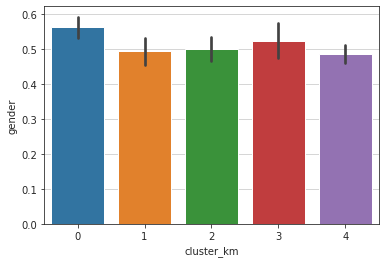

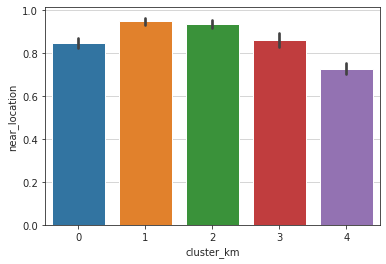

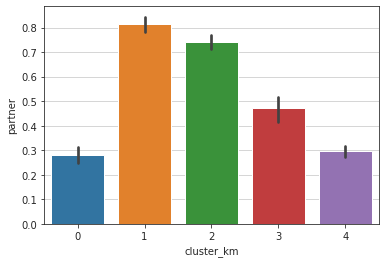

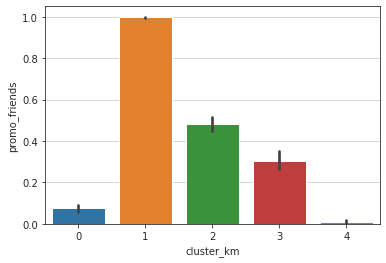

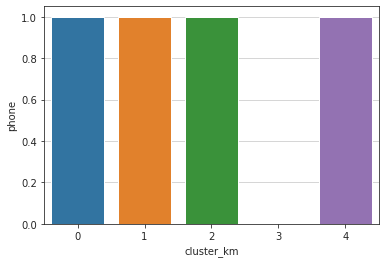

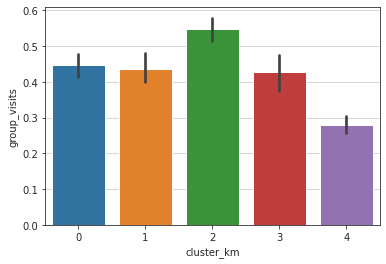

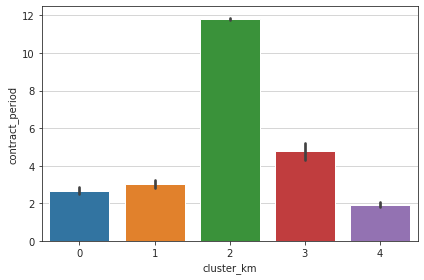

In [23]:
plt.figure(figsize=(15,12))
for i in range(len(bin_feat.columns)):
    plt.figure()
    x = data_clust['cluster_km']
    y = bin_feat.iloc[:,i]
    sns.barplot(x=x, y=y)
plt.tight_layout()
plt.show()

### Промежуточный вывод
Характеристика ушедших:
1) Проживают или работают не в районе, где находится фитнес-центр;
2) Нет факта первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
3) Не посещают груповые занятия;
4) Маленькая длительность абонемента

## Общий вывод
Наша задача удержать клиентов. Большинство ушедших ходили только один месяц, без группы без друга.
Предлагается следующая стратегия:
1) Скидки, кто пришел в первый раз на абонемент от 3 до 12 месяцев (Задержим клиента на подольше)  
2) Бесплатные несколько групповых занятий (клиент лучше социализируется с к другими клиентами зала)  
3) Акция приведи друга со всеми дальнейшими вытекающими преимуществами  